# Machine Learning-Based Approach for Solar Energy Load Forecasting & Monitoring


## Problem Definition:
Predict solar power generated using Machine Learning algorithms. We will extract data for one site YMCA.

## Project Outline:
* Solar Power Prediction using weather and solar power dataset 

## Dataset: 
The dataset contains weather and power data  from domestic premises with high uptake of solar photvoltaic(PV) embeded generation. Data collected as part of the project run by UK power networks. 
We
This dataset contains  , but we will use the following 18 features in our analysis :

1. TempOut    Outdoor Temperature 
2. OutHum     Outdoor Humidity 
3. DewPt      Dew  Point 
4. WindSpeed  Wind Speed ( average wind speed) 
5. WindRun    Wind Run is the measurement amount of wind passing the station during a given period of time
6. HiSpeed    High Wind Speed 
7. WindChill  Wind Chill 
8. HeatIndex Heat Index : uses the temperature and the relative humidity  
9. THWIndex  Temperature Humidity Wind THW Index  uses humidity temperature the colling effects of wind
10. Rain      Rainfall
11. RainRate  High Rain Rate 
12. SolarRad  Solar Raditation
13. SolarEnergy Solar Energy 
14. HiSolarRad High Solar Radiation
15. HeatD-D    Heating Degree Days 
16. CoolD-D    Cooling Degree Days

17. P_GEN Power Generated Prediction 



## Model Evaluation Proposal:



## Packages Installation:
Uncomment the following line and paste it in to a codebox:

all done via pip
* #!pip install yellowbrick
* #!pip install seaborn
* #!pip install scipy
* #!pip install grafanalib

## Import Libraries 
Import  some of the required libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display   
%matplotlib inline
pd.reset_option('precision')
np.set_printoptions(precision=2)
np.printoptions(precision=2, suppress=True, threshold=5)
#Suppressing warnings
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Normalizer
from datetime import datetime
from pytz import timezone
import pytz

In [2]:
# Seaborn Styling 
sns.set(
    font_scale=1.5,
    style="whitegrid",
    rc={'figure.figsize':(20,7)}
)

In [3]:
## Load the Solar- Weather Dataset 

In [4]:
# Read the data
solarweather = pd.read_csv('dataset/mlfinal.csv')

## Summarize the Data

In [5]:
# Check the data - sample the data
solarweather.head()

,Date,Time,TempOut,OutHum,DewPt,WindSpeed,WindChill,HeatIndex,Bar,Rain,...,SolarEnergy,HeatD0D,CoolD0D,InTemp,InHeat,InEMC,InAirDensity,DateandTimew,epochtimew,P_GEN_MAX
0,1/1/2014,0:00,5.5,93,4.5,6,3.3,5.6,749.7,0.0,...,0.0,0.267,0.0,11.1,10.4,10.59,0.0760,1/1/2014 0:00,1388534400,-0.005
1,1/1/2014,1:00,5.9,93,4.9,5,4.2,6.0,749.7,0.0,...,0.0,0.258,0.0,10.9,10.3,10.75,0.0760,1/1/2014 1:00,1388538000,-0.005
2,1/1/2014,2:00,6.3,90,4.8,6,4.3,6.3,749.6,0.0,...,0.0,0.250,0.0,10.9,10.3,10.75,0.0760,1/1/2014 2:00,1388541600,-0.005
3,1/1/2014,3:00,5.9,90,4.4,5,4.2,5.9,749.4,0.0,...,0.0,0.259,0.0,10.9,10.3,10.75,0.0760,1/1/2014 3:00,1388545200,-0.005
4,1/1/2014,4:00,5.8,92,4.6,4,4.5,5.8,749.1,0.0,...,0.0,0.262,0.0,11.1,10.4,10.75,0.0759,1/1/2014 4:00,1388548800,-0.005


In [6]:
solarweather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6783 entries, 0 to 6782
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          6783 non-null   object 
 1   Time          6783 non-null   object 
 2   TempOut       6783 non-null   float64
 3   OutHum        6783 non-null   int64  
 4   DewPt         6783 non-null   float64
 5   WindSpeed     6783 non-null   int64  
 6   WindChill     6783 non-null   float64
 7   HeatIndex     6783 non-null   float64
 8   Bar           6783 non-null   float64
 9   Rain          6783 non-null   float64
 10  RainRate      6783 non-null   float64
 11  SolarRad      6783 non-null   int64  
 12  SolarEnergy   6783 non-null   float64
 13  HeatD0D       6783 non-null   float64
 14  CoolD0D       6783 non-null   float64
 15  InTemp        6783 non-null   float64
 16  InHeat        6783 non-null   float64
 17  InEMC         6783 non-null   float64
 18  InAirDensity  6783 non-null 

## Understanding the Data
We will start by using Descriptive Statistics in Data Exploration. This is used to so we can  take a closer look at our loaded data.
### Descriprtive statistics
Let’s summarize the distribution of each attribute.

In [7]:
solarweather.describe().T

,count,mean,std,min,25%,50%,75%,max
TempOut,6783.0,1.359771e+01,5.243821e+00,0.000000e+00,9.900000e+00,1.380000e+01,1.710000e+01,3.280000e+01
OutHum,6783.0,7.842577e+01,1.378017e+01,0.000000e+00,7.000000e+01,8.200000e+01,9.000000e+01,9.800000e+01
DewPt,6783.0,9.615996e+00,4.070320e+00,0.000000e+00,6.700000e+00,9.900000e+00,1.250000e+01,1.970000e+01
WindSpeed,6783.0,2.024326e+00,2.100855e+00,0.000000e+00,0.000000e+00,1.000000e+00,3.000000e+00,1.700000e+01
WindChill,6783.0,1.340093e+01,5.477850e+00,0.000000e+00,9.650000e+00,1.380000e+01,1.710000e+01,3.280000e+01
HeatIndex,6783.0,1.352550e+01,5.257812e+00,0.000000e+00,1.000000e+01,1.360000e+01,1.710000e+01,3.490000e+01
Bar,6783.0,7.563612e+02,7.423266e+00,7.308000e+02,7.518000e+02,7.574000e+02,7.616000e+02,7.749000e+02
Rain,6783.0,2.398939e-02,1.485242e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.300000e+00
RainRate,6783.0,9.772962e-02,1.004182e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.070000e+01
SolarRad,6783.0,1.145770e+02,1.888713e+02,0.000000e+00,0.000000e+00,1.400000e+01,1.500000e+02,9.950000e+02


In [8]:
solarweather.corr(method='pearson')

,TempOut,OutHum,DewPt,WindSpeed,WindChill,HeatIndex,Bar,Rain,RainRate,SolarRad,SolarEnergy,HeatD0D,CoolD0D,InTemp,InHeat,InEMC,InAirDensity,epochtimew,P_GEN_MAX
TempOut,1.000000,-0.594521,0.810074,-0.097975,0.995871,0.997704,0.362534,-0.102809,-0.059047,0.508329,0.508327,-0.963429,0.629019,0.914303,0.917530,-0.320407,-0.779278,0.474633,0.150962
OutHum,-0.594521,1.000000,-0.019053,-0.096849,-0.584885,-0.549341,-0.301373,0.147076,0.085578,-0.674954,-0.674957,0.526380,-0.523807,-0.446209,-0.418094,0.677530,0.257671,-0.019241,-0.175935
DewPt,0.810074,-0.019053,1.000000,-0.198796,0.812431,0.840322,0.249961,-0.031476,-0.017142,0.124447,0.124443,-0.828628,0.366625,0.822216,0.845381,0.081701,-0.781041,0.580035,0.064597
WindSpeed,-0.097975,-0.096849,-0.198796,1.000000,-0.166166,-0.107507,-0.472215,0.076294,0.034421,0.180042,0.180041,0.118511,0.008239,-0.232866,-0.228173,0.115105,-0.028184,-0.230613,-0.081246
WindChill,0.995871,-0.584885,0.812431,-0.166166,1.000000,0.993448,0.399339,-0.109732,-0.061831,0.498780,0.498779,-0.963593,0.614349,0.921635,0.923407,-0.329749,-0.764624,0.495964,0.152860
HeatIndex,0.997704,-0.549341,0.840322,-0.107507,0.993448,1.000000,0.351149,-0.097100,-0.055521,0.481982,0.481980,-0.958279,0.636309,0.918393,0.924909,-0.285350,-0.794204,0.484025,0.144688
Bar,0.362534,-0.301373,0.249961,-0.472215,0.399339,0.351149,1.000000,-0.153300,-0.089753,0.169645,0.169651,-0.390453,0.107918,0.422700,0.400528,-0.377069,0.154356,0.262321,0.076645
Rain,-0.102809,0.147076,-0.031476,0.076294,-0.109732,-0.097100,-0.153300,1.000000,0.791276,-0.067683,-0.067684,0.102666,-0.054138,-0.101709,-0.095357,0.136001,0.010975,-0.081395,-0.020184
RainRate,-0.059047,0.085578,-0.017142,0.034421,-0.061831,-0.055521,-0.089753,0.791276,1.000000,-0.039372,-0.039369,0.058828,-0.031570,-0.059782,-0.056578,0.090007,0.006380,-0.024219,-0.011158
SolarRad,0.508329,-0.674954,0.124447,0.180042,0.498780,0.481982,0.169645,-0.067683,-0.039372,1.000000,1.000000,-0.428301,0.501799,0.255591,0.249893,-0.225067,-0.165243,0.012313,0.005903


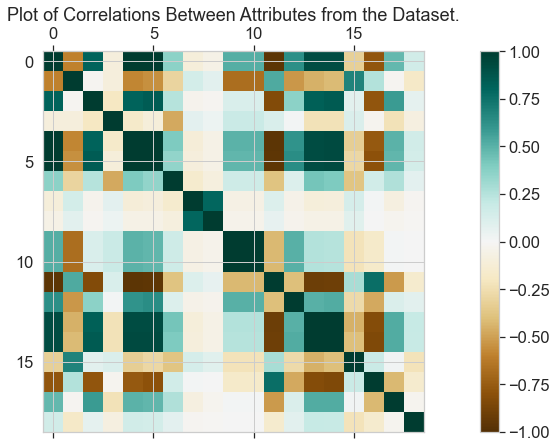

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(solarweather.corr(), vmin=-1, vmax=1, cmap='BrBG',interpolation='none')
fig.colorbar(cax)
ax.set_title('Plot of Correlations Between Attributes from the Dataset.')
plt.show()

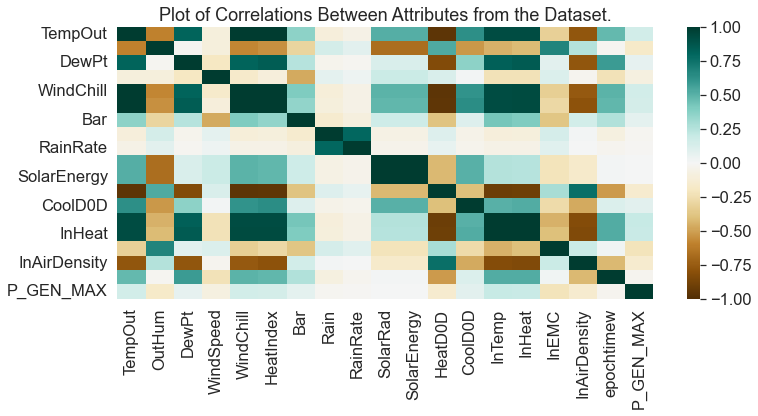

In [10]:
fig, ax = plt.subplots(1, figsize=(12, 5))
sns.heatmap(solarweather.corr() ,  vmin=-1, vmax=1, cmap='BrBG' , ax=ax)
ax.set_title('Plot of Correlations Between Attributes from the Dataset.')
plt.show()

#### Skewness and Kurtosis
* Skew refers to the distribution  that assumed to be gaussian  that is shifted in one direction or another.  It allows you to improve the accuracy of your model and better data preparation. Skewness is a measure of the symmetry of a distribution.
* Kurtosis determines the heaviness of the distribution tails.

In [11]:
solarweather.kurt()

TempOut          -0.247309
OutHum           -0.006762
DewPt            -0.552347
WindSpeed         2.610777
WindChill        -0.341297
HeatIndex        -0.137522
Bar               0.311812
Rain            142.650272
RainRate        432.999354
SolarRad          3.667668
SolarEnergy       3.667645
HeatD0D          -0.604022
CoolD0D          16.641445
InTemp           -0.505254
InHeat           -0.535523
InEMC            -0.157709
InAirDensity      0.178572
epochtimew       -0.971045
P_GEN_MAX         6.498851
dtype: float64

## Statistical Analysis Visualization

### Uni-variate Analysis
The goal is to select those features that have the strongest relationship with the output variable in addition to understand the distribution of the attributes.It allows you to describe patterns and get an idea of the distribution found in univariate data include.

####  Univariate Data Plots
We can see from the histogram chart the following attribiutes have Gaussian Distribution
Outisde Temperature , Outside Humidity and Dew Pt

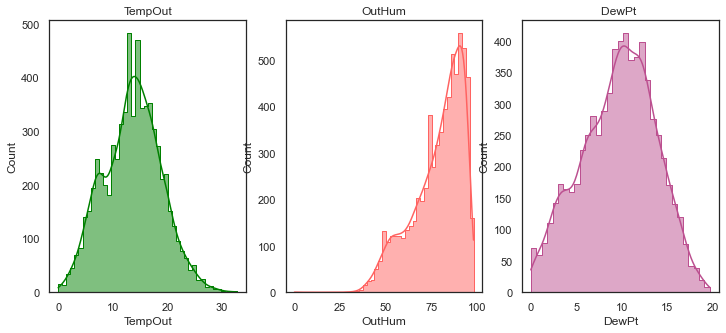

In [12]:
# Histograms - Numerical Group Stats Visualization
sns.set(style="white")
fig, axs = plt.subplots(1, 3, figsize=(12, 5))
sns.histplot(solarweather.TempOut,  element="step",color="green", kde=True, ax=axs[ 0] ).set_title("TempOut")
sns.histplot(solarweather.OutHum,  element="step", color="#ff6361",kde=True, ax=axs[ 1]).set_title("OutHum")
sns.histplot(solarweather.DewPt ,  element="step",color="#bc5090", kde=True,ax=axs[2 ] ).set_title("DewPt ")

plt.show()

scatter plots for boolean values doesnt allow us to infer that much because blue dots could bhind the orange dots or vise versa 

### Multi-variate Analysis  Investigate Existing Correlations

We look at heatmap based on our partition models to look closely in to the correlation between group with the similar types.

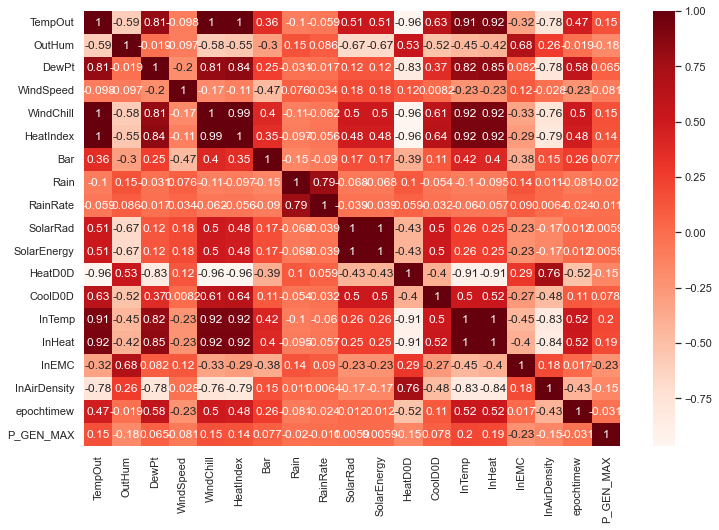

In [13]:
fig, ax = plt.subplots(1,  figsize=(12, 8))
sns.heatmap(solarweather.corr(), annot=True, cmap=plt.cm.Reds, ax=ax)
plt.show()

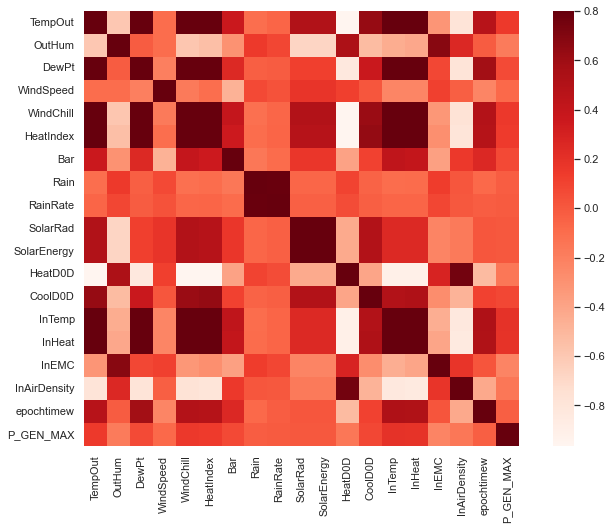

In [14]:
fig, ax = plt.subplots(1,  figsize=(12, 8))
sns.heatmap(solarweather.corr(),vmax=.8, square=True, cmap=plt.cm.Reds, ax=ax)
plt.show()

### Checking Relationship between Power Generated Temperature , Bar etc


Text(0.5, 0.98, 'Temp vs. Power generated')

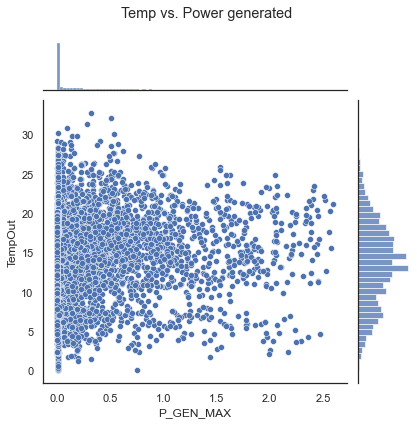

In [15]:
g = sns.jointplot(x="P_GEN_MAX", y="TempOut", data=solarweather)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Temp vs. Power generated')

Text(0.5, 0.98, 'SolarRad  vs. Power generated')

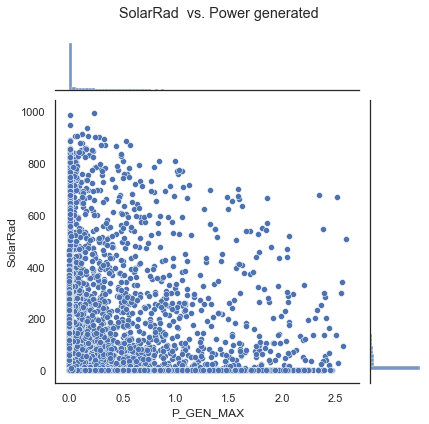

In [16]:
g = sns.jointplot(x="P_GEN_MAX", y="SolarRad", data=solarweather)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('SolarRad  vs. Power generated')

## Feature Engineering

In [17]:
#Covert time to_datetime
#Add column 'hour'

In [18]:
solarweather['Time_conv'] =  pd.to_datetime(solarweather['Time'], format='%H:%M')
solarweather['hour'] = pd.to_datetime(solarweather['Time_conv'], format='%H:%M').dt.hour

#Add column 'month'
solarweather['month'] = pd.to_datetime(solarweather['epochtimew'].astype(int), unit='s').dt.month

#Add column 'year'
solarweather['year'] = pd.to_datetime(solarweather['epochtimew'].astype(int), unit='s').dt.year

#Duration of Day
#solarweather['total_time'] = pd.to_datetime(solarweather['TimeSunSet'], format='%H:%M').dt.hour - pd.to_datetime(solarweather['TimeSunRise'], format='%H:%M').dt.hour
#solarweather.head()

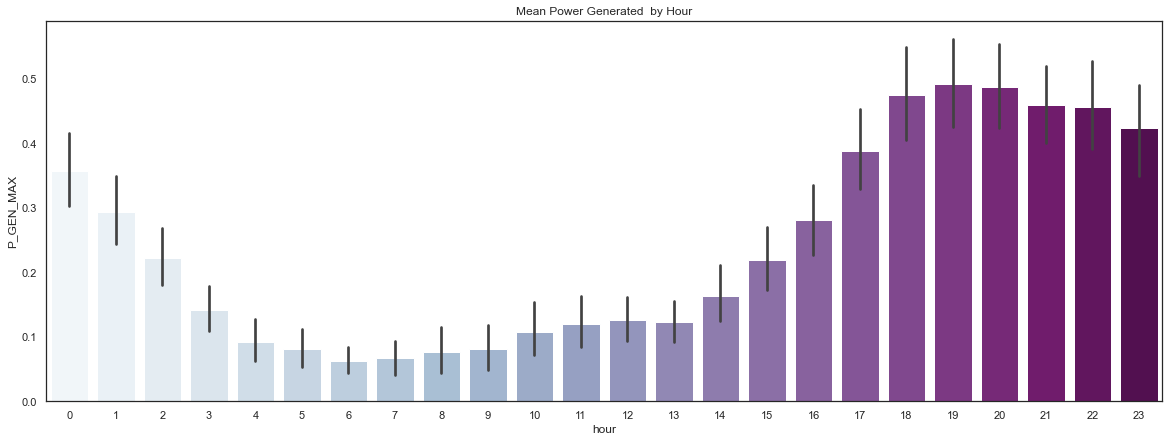

In [19]:
ax = plt.axes()
sns.barplot(x="hour", y='P_GEN_MAX', data=solarweather, palette="BuPu", ax = ax)
ax.set_title('Mean Power Generated  by Hour')
plt.show()

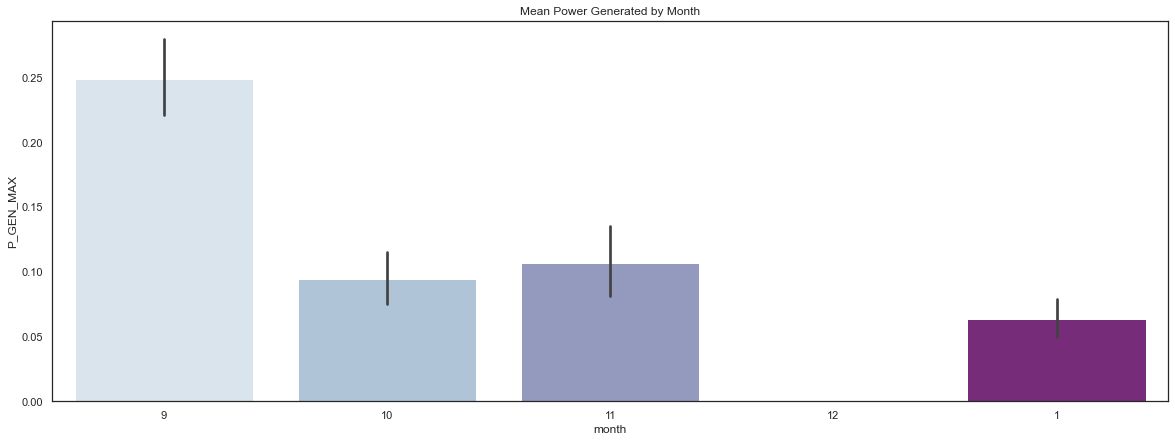

In [20]:
ax = plt.axes()
sns.barplot(x="month", y='P_GEN_MAX', data=solarweather, palette="BuPu", ax = ax, order=[9,10,11,12,1])
ax.set_title('Mean Power Generated by Month')
plt.show()

## Predict using Linear Model

In [21]:
y = solarweather['P_GEN_MAX']
X = solarweather.drop(['P_GEN_MAX', 'Date', 'Time','Time_conv','epochtimew','DateandTimew'], axis=1)

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [23]:
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [ 5.05e-02  6.98e-03 -5.40e-02 -2.21e-02 -2.76e-02 -1.38e-02 -8.98e-03
  2.39e-02 -6.43e-03 -1.37e-01  3.19e+00 -1.31e+00 -1.95e-01 -3.18e-02
  8.52e-02 -2.86e-02  6.19e+01  1.32e-02 -1.77e-02  0.00e+00]


In [24]:
predictions = lm.predict( X_test)

Text(0, 0.5, 'Predicted Y')

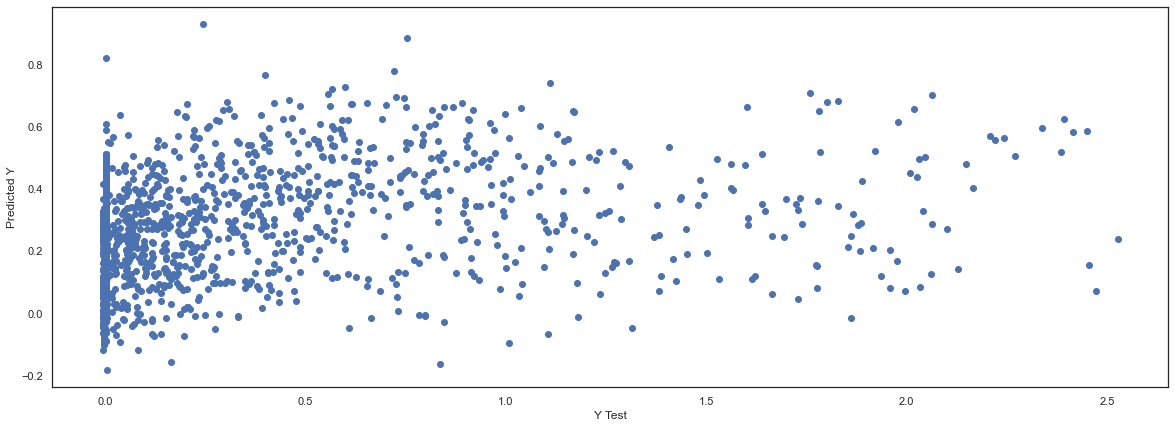

In [25]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [26]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.27569050217317864
MSE: 0.1802761880492704
RMSE: 0.42458943468870064


In [27]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
TempOut,0.050450
OutHum,0.006980
DewPt,-0.054045
WindSpeed,-0.022071
WindChill,-0.027623
HeatIndex,-0.013850
Bar,-0.008983
Rain,0.023887
RainRate,-0.006429
SolarRad,-0.137291


This is useful, you can see that some of the attributes have a skewed distribution.But using pairplot for our partition model has advantages and disadvantages. The pros can be listed as visualization is not cluttered , easier to read and udnerstand  while the cons can be we missing the correlation between different attributes just because they are not on the same group.
## Data Scaling

Data is comprised of attributes  with varying scales. Its useful for optimizing your algorithms. We will apply standard scalers on the gaussian features and apply normalization on the non gaussian features. 
### Standard Scaler

Apply standard scaler  

In [28]:
solar_data = solarweather[['','']]
names = ['','','','','','','','','','']
arrayg = solar_data.values
# seperate in to input and output components 
Xg = arrayg[:,0:8]
print(Xg)
Yg = arrayg[:,9]
print(Yg)

scaler = StandardScaler().fit(Xg)
rescaledXg = scaler.transform(Xg)
print(rescaledXg)


KeyError: "None of [Index(['', ''], dtype='object')] are in the [columns]"